### Deskryptor HOG

In [226]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import warnings
def HOG_part1(img):
    G_x = scipy.ndimage.convolve1d( np . int32 ( img ) , np . array ([ -1 , 0, 1]) ,1)
    G_y = scipy. ndimage. convolve1d ( np . int32 ( img ) , np . array ([ -1 , 0, 1]) ,0)
    m = np.sqrt(G_x*G_x + G_y*G_y)
    m = m/np.amax(m)
    max_G = np . logical_and ( m[: , :, 0] < m[: , : , 1] , m[: , : , 2] < m[: , :, 1])
    max_R = np . logical_and ( m[: , :, 0] < m[: , : , 2] , m[: , : , 1] < m[: , :, 2])
    max_B = np . logical_and ( m[: , :, 1] < m[: , : , 0] , m[: , : , 2] < m[: , :, 0])
    warnings.filterwarnings('ignore')
    theta = (b:=np.rad2deg(np.arctan(G_y/G_x))) + 180.0 * (b<0)
    theta_res = np.zeros(img.shape[0:2],dtype = np.float32)
    theta_res[max_G] = theta[max_G][:,1]
    theta_res[max_B] = theta[max_B][:,0]
    theta_res[max_R] = theta[max_R][:,2]
    m = np.max(m,axis=2)
    return m, theta_res

def HOG(img):
    m, theta = HOG_part1(img)
    
    cellSize = 8
    XX, YY = img.shape[0:2]
    
    YY_cell=np.int32(YY/cellSize)
    XX_cell=np.int32(XX/cellSize)
    histograms = np.zeros((XX_cell,YY_cell,9), dtype = np.float32)
    hist_middles = np.array(list(range(10,180,20)), dtype=np.float32)
    BW = 20.0
    for i in range(XX_cell):
        for j in range(YY_cell):
            theta_cut = theta[cellSize*i:cellSize*(i+1),cellSize*j:cellSize*(j+1)]
            m_cut = m[cellSize*i:cellSize*(i+1),cellSize*j:cellSize*(j+1)]
            for x in range(cellSize):
                for y in range(cellSize):
                    no_bucket1 = int(theta_cut[x,y]/20)%9
                    no_bucket2 = int((theta_cut[x,y]/20) + 0.5)%9
                    if no_bucket1 == no_bucket2:
                        no_bucket2 = int((theta_cut[x,y]/20) - 0.5) if ((theta_cut[x,y]/20) - 0.5) > 0 else 8
                    temp1 = (np.abs(hist_middles[no_bucket1] - theta_cut[x,y]) if np.abs(hist_middles[no_bucket1] - theta_cut[x,y])<=BW else np.abs(np.abs(hist_middles[no_bucket1] - theta_cut[x,y])-180))
                    temp2 = (np.abs(hist_middles[no_bucket2] - theta_cut[x,y]) if np.abs(hist_middles[no_bucket2] - theta_cut[x,y])<=BW else np.abs(np.abs(hist_middles[no_bucket2] - theta_cut[x,y])-180))
                    # print("diff: ", theta_cut[x,y], no_bucket1 ,temp1, m_cut[x,y])
                    # print("diff: ", theta_cut[x,y], no_bucket2 ,temp2, m_cut[x,y])
                    histograms[i,j,no_bucket1] += m_cut[x,y] * (temp2/BW)
                    # print(m_cut[x,y] * (temp2/BW))
                    # print(m_cut[x,y] * (temp1/BW))
                    histograms[i,j,no_bucket2] += m_cut[x,y] * (temp1/BW)
                    # print(no_bucket1, no_bucket2, theta_cut[x,y])
            # print(histograms[i,j])
    
    # Normalization in block
    e = math . pow (0.00001 ,2)
    F = np.array([])
    for jj in range (0 , XX_cell -1) :
        for ii in range (0 , YY_cell -1) :
            H0 = histograms [ jj,ii,:]#[::-1]
            H1 = histograms [ jj  ,ii+1, :]#[::-1]
            H2 = histograms [  jj+1 ,ii  ,:]#[::-1]
            H3 = histograms [  jj +1 ,ii +1 ,:]#[::-1]
            H = np . concatenate (( H0 , H1 , H2 , H3 ))
            n = np . linalg . norm (H)
            Hn = H/ np . sqrt ( math . pow (n ,2) + e)
            F = np . concatenate ((F , Hn ))

    # plt.imshow(m)
    # plt.show()
    # plt.imshow(theta)
    # plt.show()
    return F

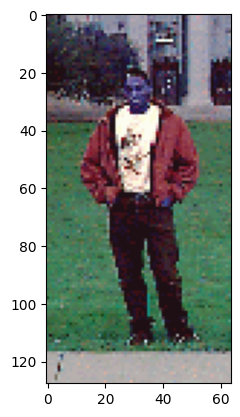

0.34841713309288025
0.15941493213176727
0.10328233987092972
0.13048262894153595
0.13657355308532715
0.09067181497812271
0.08944648504257202
0.1925991177558899
0.19861231744289398
0.16416043043136597
0.0733901783823967
0.25648215413093567
0.22726939618587494
0.26671504974365234
0.2829333543777466
0.1523563116788864
0.11406905949115753
0.2698032855987549
0.14999110996723175
0.184982031583786
0.10806695371866226
0.12114204466342926
0.18290601670742035
0.0519394725561142
0.0808873400092125
0.053419195115566254
0.10762830078601837
0.09257686883211136
0.12281902134418488
0.15284396708011627
0.1804923713207245
0.13729730248451233
0.046233441680669785
0.21048255264759064
0.0810093954205513
0.11162006109952927
0.16674304008483887
0.07454477250576019
0.2605171799659729
0.23084484040737152
0.2709110677242279
0.2873845398426056
0.1547532081604004
0.1158636212348938
0.2740478813648224
0.09456649422645569
0.0390133261680603
0.10671509057283401
0.19735197722911835
0.24484917521476746
0.16390548646450

In [227]:
import cv2

img = cv2.imread("pos/per00060.ppm")
plt.imshow(img)
plt.show()
res = HOG(img)
for i in res:
    print(i)

### Zad 11.2

In [228]:
HOG_data = np . zeros ([2*100 ,3781] , np . float32 )
for i in range (0 ,100) :
    IP = cv2 . imread ('pos/per%05d.ppm' % (i +1) )
    IN = cv2 . imread ('neg/neg%05d.png' % (i +1) )
    F = HOG( IP )
    HOG_data [i ,0] = 1
    HOG_data [i ,1:] = F
    F = HOG( IN )
    HOG_data [i +100 ,0] = 0
    HOG_data [i +100 ,1:] = F

In [229]:
labels = HOG_data [: ,0]
data = HOG_data [: ,1:]


In [230]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(data, labels)
lp = clf.predict(data)


In [231]:
from sklearn import metrics
metrics.confusion_matrix(labels,lp)

array([[100,   0],
       [  0, 100]], dtype=int64)

### Test

In [232]:
HOG_data = np . zeros ([2*100 ,3781] , np . float32 )
for i in range (100 ,200) :
    IP = cv2 . imread ('pos/per%05d.ppm' % (i +1) )
    IN = cv2 . imread ('neg/neg%05d.png' % (i +1) )
    F = HOG( IP )
    HOG_data [i-100 ,0] = 1
    HOG_data [i-100 ,1:] = F
    F = HOG( IN )
    HOG_data [i-100 +100 ,0] = 0
    HOG_data [i-100 +100 ,1:] = F
lp = clf.predict(data)
metrics.confusion_matrix(labels,lp)

array([[100,   0],
       [  0, 100]], dtype=int64)

### Zad 3

In [246]:
def non_max_suppression(rectangles, overlap_thresh=0.3):
    if len(rectangles) == 0:
        return []

    if rectangles.dtype.kind == "i":
        rectangles = rectangles.astype("float")

    pick = []
    x1 = rectangles[:, 0]
    y1 = rectangles[:, 1]
    x2 = rectangles[:, 0] + rectangles[:, 2]
    y2 = rectangles[:, 1] + rectangles[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))

    return rectangles[pick].astype("int")

def detect_pedestrians(image, svm, step_size=8, scale=1.0):
    rectangles = []
    original_image = image.copy()
    height, width = image.shape[:2]

    if height < 128 or width < 64:
        return original_image

    for y in range(0, height - 128, step_size):
        for x in range(0, width - 64, step_size):
            window = image[y:y + 128, x:x + 64]
            hog_descriptor = HOG(window)
            prediction = svm.predict([hog_descriptor])
            if prediction == 1:
                rectangles.append((x, y, int(64 * scale), int(128 * scale)))

    rectangles = np.array(rectangles)
    rectangles = non_max_suppression(rectangles)

    for (x, y, w, h) in rectangles:
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return original_image

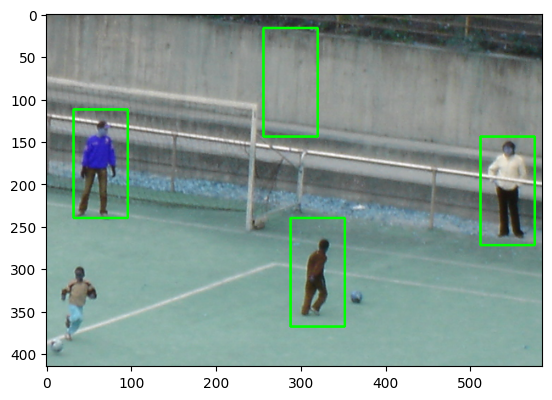

In [247]:
img = cv2.imread('test/testImage1.png')
img = cv2.resize(img,(int(img.shape[1]/1.2), int(img.shape[0]/1.2)))
plt.imshow(detect_pedestrians(img, clf,16))